<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Projeto Semantix - Resultado da Arrecadação Federal**

Aluno [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 24 de janeiro de 2024


## Etapa 1: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio e quais os objetivos. 

Apresentamos o nosso projeto de **Arrecadação Federal** dos Estados Brasileiros. Este projeto é baseado em um desenho amostral de 25 anos, utilizando 8 anos de performance.

O objetivo principal deste projeto é **analisar e classificar os Estados Brasileiros de acordo com os impostos arrecadados**, com base nos impostos de importação e exportação arrecadado durante um período. Esta classificação é crucial para identificar quais Estados precisam de mais investimentos.

Através do uso de técnicas avançadas de modelagem e análise, estamos confiantes de que podemos fornecer uma ferramenta robusta e eficaz para ajudar na tomada de decisões.

Os dados utilizados são das Unidades de Federação do Brasil conforme link abaixo:

https://basedosdados.org/dataset/ab4af450-6b41-412e-b7cb-ec7030646c3d?table=17405008-7635-4b38-a14b-bdfcf78351b2

<br>

## Etapa 2: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 45 variáveis, porém para esse projeto iremos analisar somente as variáveis referentes ao imposto de importação e exportação. O significado de cada uma dessas variáveis se encontra na tabela abaixo.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para as Unidades Federativas e uma coluna para cada variável armazenando as características dessas unidades.

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ano| Ano de referência |inteiro|
| mes| Mês de referência |inteiro|
| sigla_uf| Sigla da Unidade da Federação |texto|
| imposto_importacao| Imposto sobre a Importação |float|
| imposto_exportacao| Imposto sobre a Exportação |float|
| status_importacao| Classificação da importação (ex: Sem Exportação, Precisa investir, Boa Exportação) |binária|
| status_exportacao | Classificação da exportação  (ex: Sem Exportação, Precisa investir, Boa Exportação)| binária |
| uf_imp | Indica se UF possui imposto de importação (1 = sim, 0 = não) | binária |
| uf_exp | Indica se UF possui imposto de exportação (1 = sim, 0 = não) |binária|

#### Carregando as Bibliotecas/pacotes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as px
import ipywidgets as widgets
import plotly.graph_objects as go

from pycaret.classification import *
from scipy.stats import t
from ydata_profiling import ProfileReport
from sklearn import metrics
from scipy.stats import ks_2samp
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/laysfelix/Semantix/refs/heads/main/br_rf_arrecadacao_uf.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head(10)

Número de linhas e colunas da tabela: (7911, 45)


,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao,ipi_fumo,ipi_bebidas,ipi_automoveis,ipi_importacoes,ipi_outros,...,refis,paes,retencoes_fonte,pagamento_unificado,outras_receitas_rfb,demais_receitas,receita_previdenciaria,receita_previdenciaria_propria,receita_previdenciaria_demais,receitas_outros_orgaos
0,2019,1,AC,75614.39,0.00,0.0,405772.77,0.00,43.50,38359.94,...,NaN,NaN,NaN,NaN,566326.76,NaN,9.482679e+07,NaN,NaN,6.194045e+05
1,2019,2,AC,74008.64,107.06,0.0,115919.43,11017.74,2913.20,20848.47,...,NaN,NaN,NaN,NaN,430579.10,NaN,8.101877e+07,NaN,NaN,1.068504e+06
2,2019,3,AC,368388.57,0.00,0.0,236585.19,11501.16,701344.08,24110.04,...,NaN,NaN,NaN,NaN,454062.07,NaN,8.392409e+07,NaN,NaN,6.926233e+05
3,2019,9,AC,6236.47,11.74,0.0,164211.93,24574.15,0.00,31486.02,...,NaN,NaN,NaN,NaN,140724.26,NaN,1.242954e+08,NaN,NaN,5.476817e+05
4,2019,6,AC,4170.46,12.50,0.0,146149.46,12084.18,0.00,32599.61,...,NaN,NaN,NaN,NaN,392009.05,NaN,1.264125e+08,NaN,NaN,5.772982e+05
5,2019,10,AC,2794.22,0.00,0.0,149384.84,0.00,202258.15,24040.10,...,NaN,NaN,NaN,NaN,344522.04,NaN,1.154539e+08,NaN,NaN,6.529613e+05
6,2019,12,AC,619.85,0.00,0.0,177174.60,0.00,0.00,27808.41,...,NaN,NaN,NaN,NaN,370509.94,NaN,2.433880e+08,NaN,NaN,9.428372e+05
7,2019,8,AC,32757.29,0.00,0.0,132446.80,6820.28,57830.47,30480.04,...,NaN,NaN,NaN,NaN,133067.76,NaN,1.149370e+08,NaN,NaN,6.776377e+05
8,2019,11,AC,14289.93,0.00,0.0,80825.87,0.00,380810.54,41880.09,...,NaN,NaN,NaN,NaN,809038.00,NaN,1.245551e+08,NaN,NaN,5.084698e+05
9,2019,4,AC,83013.48,0.00,0.0,135785.12,4528.88,0.00,21862.88,...,NaN,NaN,NaN,NaN,483004.54,NaN,8.786582e+07,NaN,NaN,7.841080e+05


Identificamos que muitas colunas talvez não agreguem informações relevantes e diminuem o tempo de processamento. 
Para lidar com isso, vamos filtrar nosso dataset somente com as colunas que queremos analisar.

In [3]:
#Filtrando o dataframe 
Imposto_filtrado =df[['ano', 'mes', 'sigla_uf', 'imposto_importacao', 'imposto_exportacao']]

#df filtrado
Imposto_filtrado.head()

,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao
0,2019,1,AC,75614.39,0.00
1,2019,2,AC,74008.64,107.06
2,2019,3,AC,368388.57,0.00
3,2019,9,AC,6236.47,11.74
4,2019,6,AC,4170.46,12.50


Conhecendo os dados e verificando suas princiais características.

In [4]:
#criando função para exibir as características do dataset
def dados(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*60)
    print('TIPOS DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-'*60)
    print('NÚMERO DE VALORES ÚNICOS POR FEATURE \n')
    print(data.nunique())
    print('\n', '-'*60)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum().sort_values(ascending=False))
    print('\n', '-'*60)
    print('ESTATÍSTICAS BÁSICAS')
    print(data.describe())

In [5]:
#Utilizando a função acima
dados(Imposto_filtrado)

DATASET SHAPE:  (7911, 5) 

------------------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 7911 non-null   int64  
 1   mes                 7911 non-null   int64  
 2   sigla_uf            7911 non-null   object 
 3   imposto_importacao  7911 non-null   float64
 4   imposto_exportacao  7911 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 309.1+ KB
None

 ------------------------------------------------------------
NÚMERO DE VALORES ÚNICOS POR FEATURE 

ano                     25
mes                     12
sigla_uf                27
imposto_importacao    7883
imposto_exportacao    6213
dtype: int64

 ------------------------------------------------------------
VALORES NULOS POR FEATURE
ano                   0
me

### Perfil Geral dos dados

In [6]:
# Crie um relatório de perfil de dados para df_train
profile = ProfileReport(Imposto_filtrado, title="Relatório dos impostos de importação e exportação do Brasil")

# Gere o relatório no próprio Jupyter Notebook
profile.to_notebook_iframe()

# Salvando o relatório como um arquivo HTML
profile.to_file("Impostos.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Análise univariada e bivariada

Text(0, 0.5, 'Quantidade de registros')

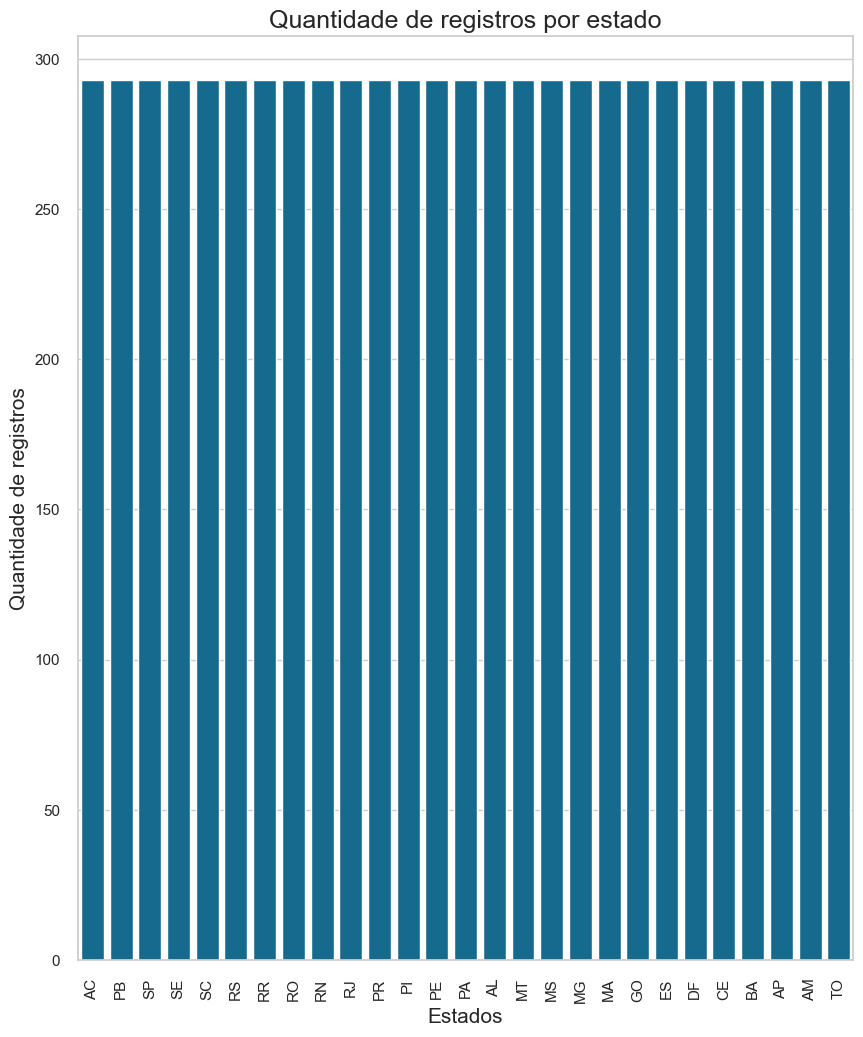

In [7]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,12))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=Imposto_filtrado, 
                 x='sigla_uf',  
                 order=Imposto_filtrado['sigla_uf'].value_counts().index,
                )
ax.set_title('Quantidade de registros por estado', fontsize=18)
ax.set_xlabel('Estados', fontsize=15)
ax.set_ylabel('Quantidade de registros', fontsize=15)    

Text(0, 0.5, 'Quantidade de registros')

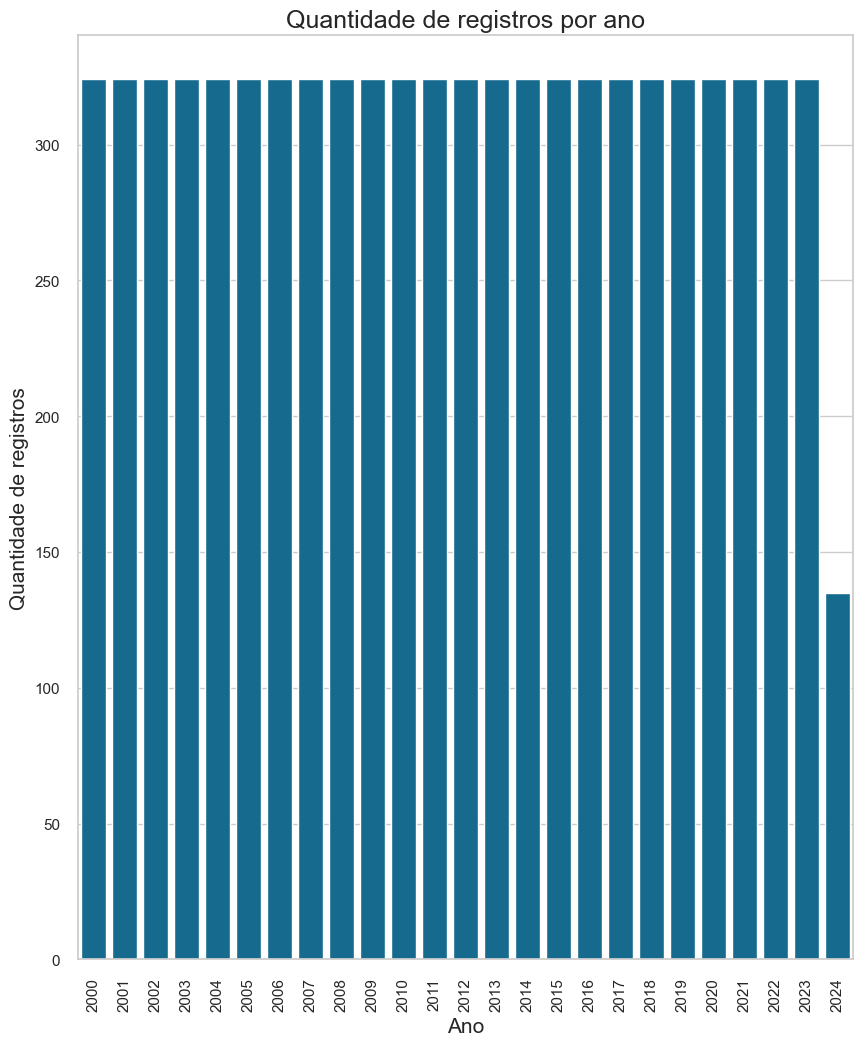

In [8]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,12))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=Imposto_filtrado, 
                 x='ano')
ax.set_title('Quantidade de registros por ano', fontsize=18)
ax.set_xlabel('Ano', fontsize=15)
ax.set_ylabel('Quantidade de registros', fontsize=15)   

Text(0, 0.5, 'Quantidade de registros')

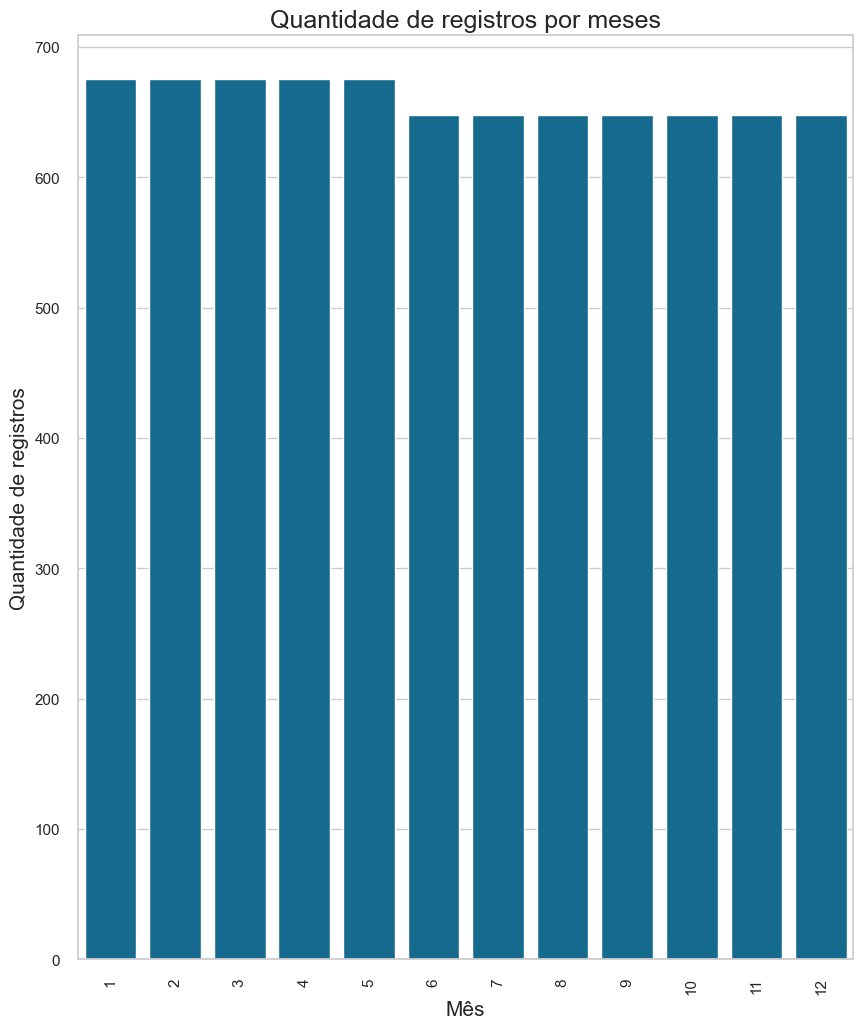

In [9]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,12))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=Imposto_filtrado, 
                 x='mes')
ax.set_title('Quantidade de registros por meses', fontsize=18)
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Quantidade de registros', fontsize=15)   

**Distribuição variáveis contínuas:**

In [10]:
#criando função para avaliar os impostos de importacao e exportação
def plot_continuous(df, column, bins):
    # Aumentar o tamanho da figura
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title('Histograma de ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.ticklabel_format(style='plain', axis='both')  # Adicionado para remover a notação científica em ambos os eixos
    plt.tight_layout()
    plt.show()

**imposto_importacao**

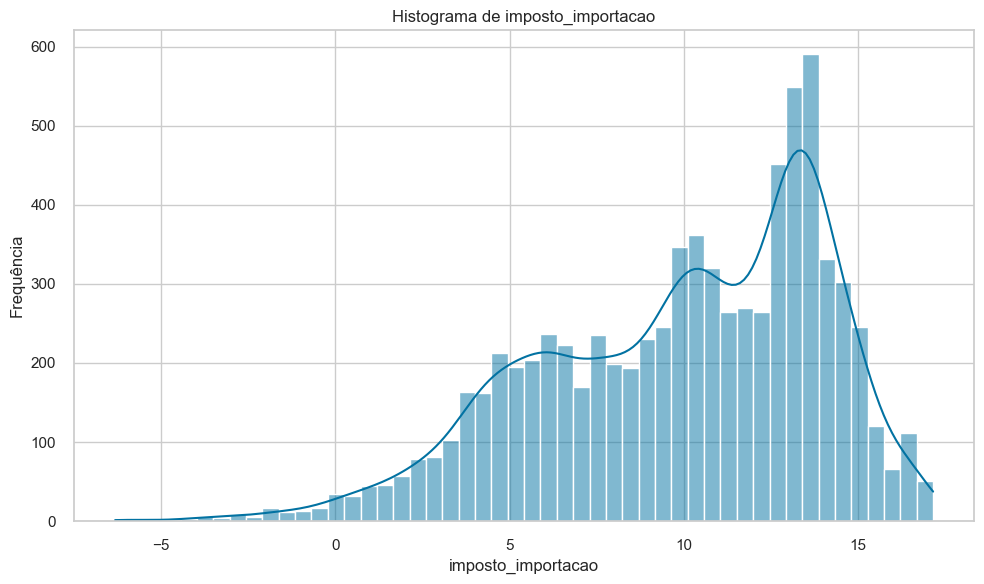

In [11]:
# Dividir imposto_importacao por 100 e depois aplicar a transformação logarítmica
imposto_importacao_log_100 = np.log(Imposto_filtrado['imposto_importacao'] / 100)

plot_continuous(imposto_importacao_log_100.to_frame(), 'imposto_importacao', 50)

**imposto_exportacao**

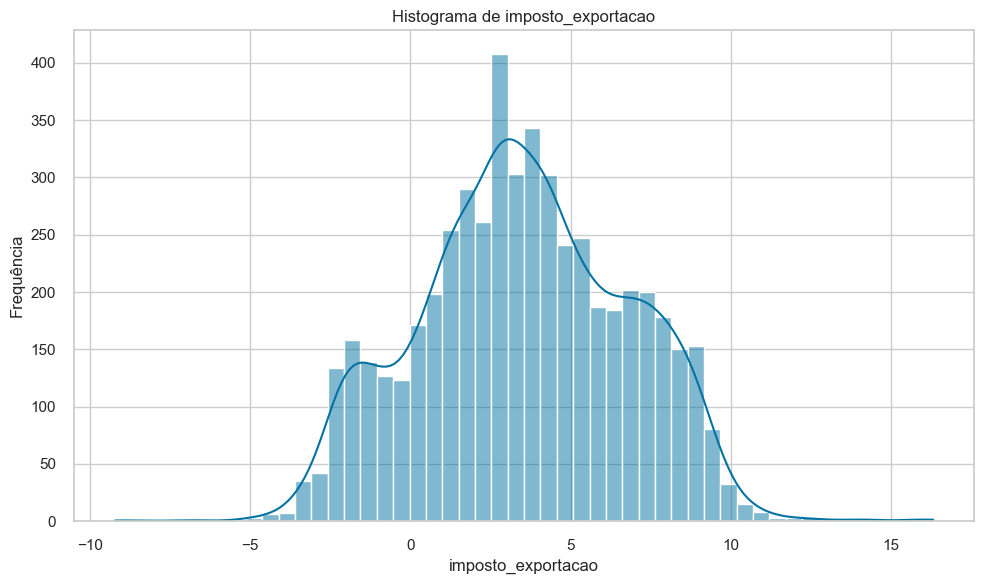

In [12]:
# Dividir imposto_importacao por 100 e depois aplicar a transformação logarítmica
imposto_exportacao_log_100 = np.log(Imposto_filtrado['imposto_exportacao'] / 100)

plot_continuous(imposto_exportacao_log_100.to_frame(), 'imposto_exportacao', 50)

- A variável **imposto_importacao** na base logarítimica natural dividida por 100 apresenta uma distribuição assimétrica negativa para positiva.
- A variável **imposto_exportacao** apresenta uma distribuição normal.

### Criando colunas qualitativas

In [13]:
def imposto_importacao(num):
    if num == 0.00:        
        return 'Sem Importação'
    elif num <= 10000.00:
        return 'Precisa investir'
    elif num >= 10000.00:
        return 'Boa Importação'

In [14]:
Imposto_filtrado['status_importacao'] = Imposto_filtrado['imposto_importacao'].map(imposto_importacao)

In [15]:
def imposto_exportacao(num):
    if num == 0.00:        
        return 'Sem Exportação'
    elif num <= 10000.00:
        return 'Precisa investir'
    elif num >= 10000.00:
        return 'Boa Exportação'

In [16]:
Imposto_filtrado['status_exportacao'] = Imposto_filtrado['imposto_exportacao'].map(imposto_exportacao)

In [17]:
Imposto_filtrado.head(10)

,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao,status_importacao,status_exportacao
0,2019,1,AC,75614.39,0.00,Boa Importação,Sem Exportação
1,2019,2,AC,74008.64,107.06,Boa Importação,Precisa investir
2,2019,3,AC,368388.57,0.00,Boa Importação,Sem Exportação
3,2019,9,AC,6236.47,11.74,Precisa investir,Precisa investir
4,2019,6,AC,4170.46,12.50,Precisa investir,Precisa investir
5,2019,10,AC,2794.22,0.00,Precisa investir,Sem Exportação
6,2019,12,AC,619.85,0.00,Precisa investir,Sem Exportação
7,2019,8,AC,32757.29,0.00,Boa Importação,Sem Exportação
8,2019,11,AC,14289.93,0.00,Boa Importação,Sem Exportação
9,2019,4,AC,83013.48,0.00,Boa Importação,Sem Exportação


### Criando as variáveis 'uf_imp' e 'uf_exp' 

Como a maior quantidade de registros são no imposto importação e tem poucos valores negativos comparando com o imposto exportação, decidi que a variável resposta seria baseada nesse índice de acordo com o estado.

In [18]:
#Criando as coluna UF_IMP E UF_EXP, ONDE 0 NÃO tem importação/exportação no estado e 1 tem importação/exportação no estado 
Imposto_filtrado.loc[Imposto_filtrado['imposto_importacao'] == 0.00, 'uf_imp'] = False
Imposto_filtrado.loc[Imposto_filtrado['imposto_importacao'] > 0.00, 'uf_imp'] = True

Imposto_filtrado.loc[Imposto_filtrado['imposto_exportacao'] == 0.00, 'uf_exp'] = False
Imposto_filtrado.loc[Imposto_filtrado['imposto_exportacao'] > 0.00, 'uf_exp'] = True

In [19]:
Imposto_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 7911 non-null   int64  
 1   mes                 7911 non-null   int64  
 2   sigla_uf            7911 non-null   object 
 3   imposto_importacao  7911 non-null   float64
 4   imposto_exportacao  7911 non-null   float64
 5   status_importacao   7911 non-null   object 
 6   status_exportacao   7911 non-null   object 
 7   uf_imp              7907 non-null   object 
 8   uf_exp              6121 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 556.4+ KB


In [20]:
Imposto_filtrado.head(10)

,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao,status_importacao,status_exportacao,uf_imp,uf_exp
0,2019,1,AC,75614.39,0.00,Boa Importação,Sem Exportação,True,False
1,2019,2,AC,74008.64,107.06,Boa Importação,Precisa investir,True,True
2,2019,3,AC,368388.57,0.00,Boa Importação,Sem Exportação,True,False
3,2019,9,AC,6236.47,11.74,Precisa investir,Precisa investir,True,True
4,2019,6,AC,4170.46,12.50,Precisa investir,Precisa investir,True,True
5,2019,10,AC,2794.22,0.00,Precisa investir,Sem Exportação,True,False
6,2019,12,AC,619.85,0.00,Precisa investir,Sem Exportação,True,False
7,2019,8,AC,32757.29,0.00,Boa Importação,Sem Exportação,True,False
8,2019,11,AC,14289.93,0.00,Boa Importação,Sem Exportação,True,False
9,2019,4,AC,83013.48,0.00,Boa Importação,Sem Exportação,True,False


In [23]:
#Verifico que tem valores negativos no imposto_importacao
Imposto_filtrado.imposto_importacao.value_counts().sort_index()

imposto_importacao
-5.915950e+05     1
-1.792566e+05     1
-5.357000e+03     1
-3.672000e+03     1
 0.000000e+00    23
                 ..
 2.432077e+09     1
 2.448990e+09     1
 2.486882e+09     1
 2.576984e+09     1
 2.795288e+09     1
Name: count, Length: 7883, dtype: int64

In [24]:
Imposto_filtrado.uf_imp.value_counts()

uf_imp
True     7884
False      23
Name: count, dtype: int64

In [25]:
#Verifico que tem valores negativos no imposto_exportacao
Imposto_filtrado.imposto_exportacao.value_counts().sort_index()

imposto_exportacao
-3.379762e+06    1
-9.155959e+05    1
-8.436670e+05    1
-8.105945e+05    1
-6.715078e+05    1
                ..
 2.021012e+08    1
 7.018676e+08    1
 8.997173e+08    1
 9.175815e+08    1
 1.206944e+09    1
Name: count, Length: 6213, dtype: int64

In [26]:
Imposto_filtrado.uf_exp.value_counts()

uf_exp
True     5203
False     918
Name: count, dtype: int64

<br>

Boa importação representam 87.64% da classificação dos impostos de importação


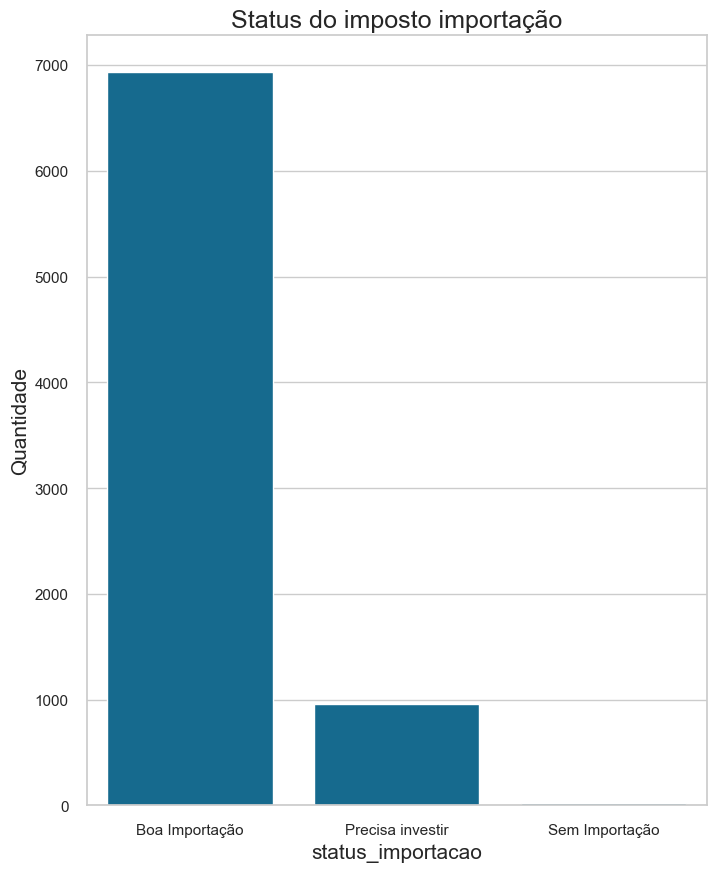

In [27]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(8,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Imposto_filtrado, 
                 x='status_importacao',  
                 order=Imposto_filtrado['status_importacao'].value_counts().index,
                )
ax.set_title('Status do imposto importação', fontsize=18)
ax.set_xlabel('status_importacao', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15) 

porcentagem_importacao = (Imposto_filtrado['status_importacao'].value_counts()[0])/(Imposto_filtrado['status_importacao'].value_counts().sum())
print('Boa importação representam {:.2f}% da classificação dos impostos de importação'.format(porcentagem_importacao*100))

Precisa investir representam 64.73% da classificação dos impostos de exportação


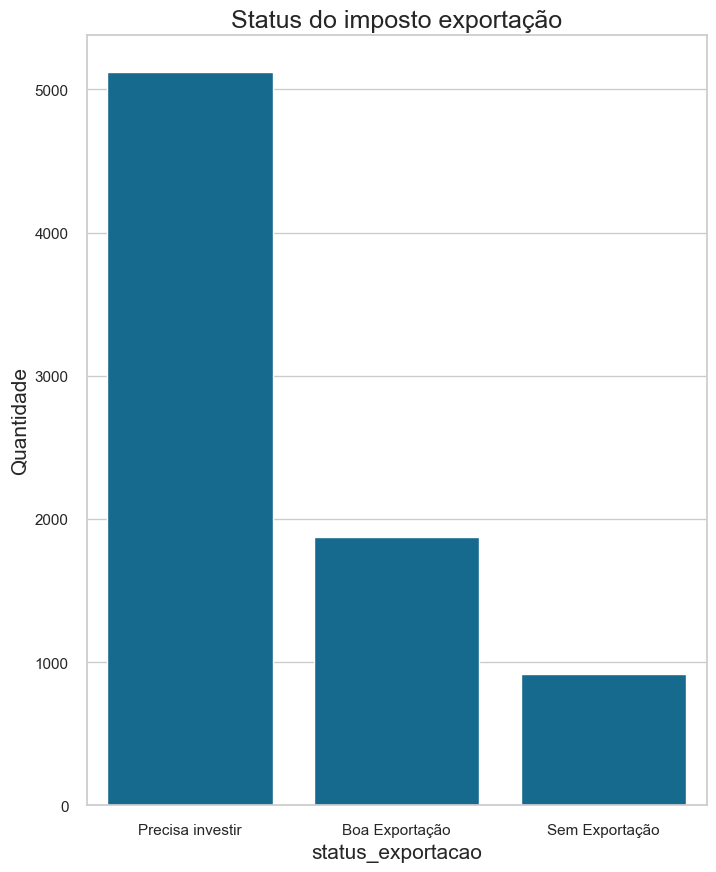

In [28]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(8,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Imposto_filtrado, 
                 x='status_exportacao',  
                 order=Imposto_filtrado['status_exportacao'].value_counts().index,
                )
ax.set_title('Status do imposto exportação', fontsize=18)
ax.set_xlabel('status_exportacao', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15) 

porcentagem_exportacao = (Imposto_filtrado['status_exportacao'].value_counts()[0])/(Imposto_filtrado['status_exportacao'].value_counts().sum())
print('Precisa investir representam {:.2f}% da classificação dos impostos de exportação'.format(porcentagem_exportacao*100))

99.71% representam a importação dos estados brasileiros


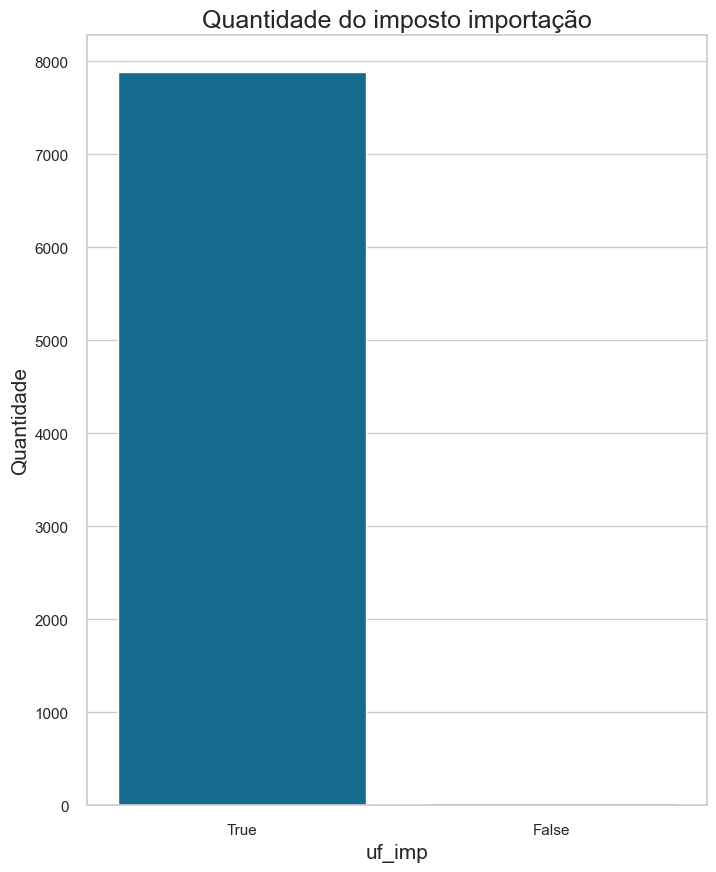

In [29]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(8,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Imposto_filtrado, 
                 x='uf_imp',  
                 order=Imposto_filtrado['uf_imp'].value_counts().index,
                )
ax.set_title('Quantidade do imposto importação', fontsize=18)
ax.set_xlabel('uf_imp', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15) 

porcentagem_exportacao = (Imposto_filtrado['uf_imp'].value_counts()[0])/(Imposto_filtrado['uf_imp'].value_counts().sum())
print('{:.2f}% representam a importação dos estados brasileiros'.format(porcentagem_exportacao*100))

85.00% representam a exportação dos estados brasileiros


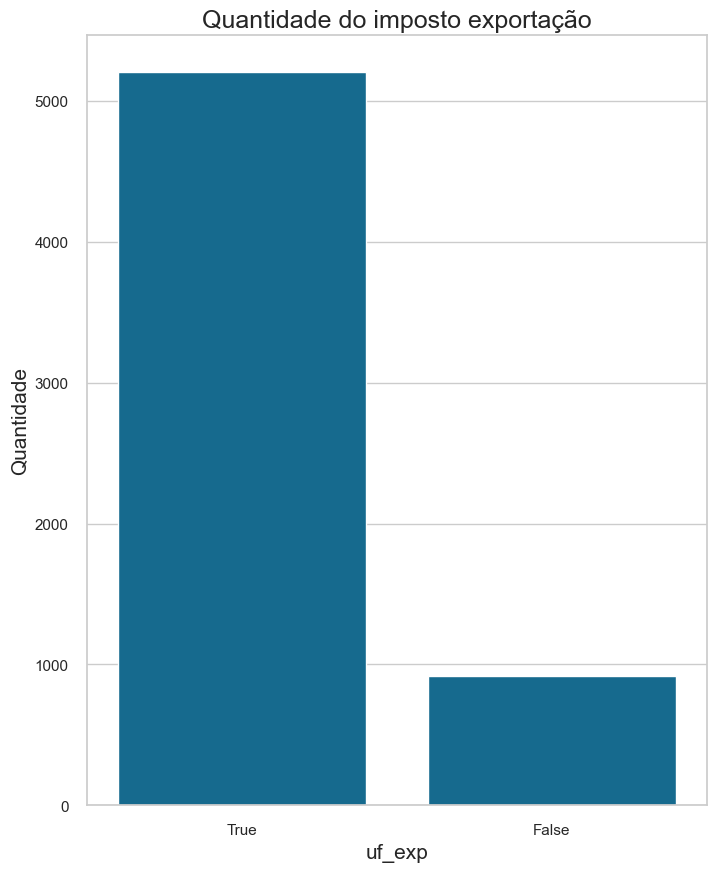

In [30]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(8,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Imposto_filtrado, 
                 x='uf_exp',  
                 order=Imposto_filtrado['uf_exp'].value_counts().index,
                )
ax.set_title('Quantidade do imposto exportação', fontsize=18)
ax.set_xlabel('uf_exp', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15) 

porcentagem_exportacao = (Imposto_filtrado['uf_exp'].value_counts()[0])/(Imposto_filtrado['uf_exp'].value_counts().sum())
print('{:.2f}% representam a exportação dos estados brasileiros'.format(porcentagem_exportacao*100))

<br>

## Etapa 3: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

### Metadados

In [31]:
# metadados para análise das variáveis
metadados = pd.DataFrame(Imposto_filtrado.dtypes, columns=['dtype'])

# Valores missing
metadados['missing'] = Imposto_filtrado.isna().sum()

# Categorias
metadados['valores_unicos'] = Imposto_filtrado.nunique()

# Adicionando a coluna 'papel' ao DataFrame 'metadados' e inicializando com o valor 'covariavel'
metadados['papel'] = 'covariavel'

# Alterando o valor da coluna 'papel' para 'resposta' na linha correspondente à coluna 'mau'
metadados.loc['uf_imp', 'papel'] = 'resposta'

# Transformar a variável resposta em booleano
Imposto_filtrado['uf_imp'] = Imposto_filtrado.uf_imp.astype('bool')
Imposto_filtrado['uf_exp'] = Imposto_filtrado.uf_exp.astype('bool')

metadados

,dtype,missing,valores_unicos,papel
ano,int64,0,25,covariavel
mes,int64,0,12,covariavel
sigla_uf,object,0,27,covariavel
imposto_importacao,float64,0,7883,covariavel
imposto_exportacao,float64,0,6213,covariavel
status_importacao,object,0,3,covariavel
status_exportacao,object,0,3,covariavel
uf_imp,object,4,2,resposta
uf_exp,object,1790,2,covariavel


**Tratamento para valores Missings**

In [32]:
#Excluindo os dados faltantes das variáveis uf_imp e uf_exp porque se refere aos valores negativos dos imposto_importacao e imposto_exportacao
Imposto_filtrado = Imposto_filtrado.dropna()

In [33]:
Imposto_filtrado.isna().sum()

ano                   0
mes                   0
sigla_uf              0
imposto_importacao    0
imposto_exportacao    0
status_importacao     0
status_exportacao     0
uf_imp                0
uf_exp                0
dtype: int64

<br>

**Balanceamento das classes**
<br>
Notamos que as classes da variável 'uf_imp' está bem desbalanceada para o evento True. 

In [34]:
# Distribuição das classes pelas bases de treino e teste
class_counts = Imposto_filtrado["uf_imp"].value_counts()

# Proporção por bases
class_proportions = class_counts / len(Imposto_filtrado)

class_proportions

uf_imp
True     0.997093
False    0.002907
Name: count, dtype: float64

<br>

**Desenvolvimento do modelo**

In [35]:
# Crie uma lista com os nomes das colunas
vars_selec = ['ano', 'mes', 'sigla_uf','imposto_importacao', 'imposto_exportacao', 'status_importacao', 'status_exportacao', 'uf_imp', 'uf_exp']

In [36]:
setup0 = setup(data = Imposto_filtrado[vars_selec], target = 'uf_imp')

,Description,Value
0,Session id,1489
1,Target,uf_imp
2,Target type,Binary
3,Original data shape,"(7911, 9)"
4,Transformed data shape,"(7911, 13)"
5,Transformed train set shape,"(5537, 13)"
6,Transformed test set shape,"(2374, 13)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


<br>

**Criação das variáveis Dummy** ---- NÃO EXECUTAR POR ENQUANTO

In [42]:
def convert_dummy(Imposto_filtrado, feature,rank=0):
    pos = pd.get_dummies(Imposto_filtrado[feature], prefix=feature)
    mode = Imposto_filtrado[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    Imposto_filtrado.drop([feature],axis=1,inplace=True)
    Imposto_filtrado=Imposto_filtrado.join(pos)
    return Imposto_filtrado

In [43]:
for var in metadados[metadados['dtype'] == 'object'].index:
    Imposto_filtrado = convert_dummy(Imposto_filtrado, var)

In [44]:
Imposto_filtrado

,ano,mes,imposto_importacao,imposto_exportacao,sigla_uf_AL,sigla_uf_AM,sigla_uf_AP,sigla_uf_BA,sigla_uf_CE,sigla_uf_DF,...,sigla_uf_SC,sigla_uf_SE,sigla_uf_SP,sigla_uf_TO,status_importacao_Precisa investir,status_importacao_Sem Importação,status_exportacao_Boa Exportação,status_exportacao_Sem Exportação,uf_imp_False,uf_exp_False
0,2019,1,7.561439e+04,0.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2019,2,7.400864e+04,107.06,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2019,3,3.683886e+05,0.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2019,9,6.236470e+03,11.74,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2019,6,4.170460e+03,12.50,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,2010,10,4.569255e+07,14073.79,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7907,2010,9,1.262747e+05,28.56,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7908,2010,9,1.957479e+05,677.36,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7909,2010,9,8.987320e+03,83.99,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


<br>

## Etapa 4: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem (escolhida: **random forest**)
- Desenho do teste
- Avaliação do modelo

### Separação dos Dados para amostragem

**df_train** = Dados dos anos 2020 até 2016

**df_oot** = Dados do ano de 2017 até 2024

In [46]:
# Data de corte como "2016-01-01" para o OOT
data_final = 2017

# Separa os dados para treinamento e validação OOT
df_train = Imposto_filtrado[Imposto_filtrado['ano'] < data_final].copy()
df_oot = Imposto_filtrado[Imposto_filtrado['ano'] >= data_final].copy()

In [50]:
# Tirando a v. resposta da base de treinamento
x = Imposto_filtrado.drop("uf_imp_False",axis = 1)#dummy alterou o nome da coluna de 'uf_imp' para 'uf_imp_False'
y = Imposto_filtrado["uf_imp_False"]#uf_imp_False

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [51]:
x_train

,ano,mes,imposto_importacao,imposto_exportacao,sigla_uf_AL,sigla_uf_AM,sigla_uf_AP,sigla_uf_BA,sigla_uf_CE,sigla_uf_DF,...,sigla_uf_RS,sigla_uf_SC,sigla_uf_SE,sigla_uf_SP,sigla_uf_TO,status_importacao_Precisa investir,status_importacao_Sem Importação,status_exportacao_Boa Exportação,status_exportacao_Sem Exportação,uf_exp_False
6750,2022,4,3.048339e+05,-89.75,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2158,2011,3,3.737943e+06,624.97,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2241,2011,8,5.511729e+06,8470.02,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26,2019,7,5.310378e+07,-2.46,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2825,2021,3,3.997536e+07,2306.78,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2020,9,2.658661e+07,26966.61,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2013,2023,7,5.745290e+04,0.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
411,2007,12,1.192800e+08,7134.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7808,2010,12,1.915809e+08,18766.93,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


<br>

### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [55]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=5)#(n_estimators=3 teve 99,90% de acurácia)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=5, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [56]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 100.00%


In [57]:
# Matriz de confusão

tab = pd.crosstab(index=y_pred, columns=y_test)
print(tab.iloc[0, 1] / (tab.iloc[0, 1] + tab.iloc[0, 0]))
print(tab.iloc[1, 1] / (tab.iloc[1, 1] + tab.iloc[1, 0]))
tab

0.0
1.0


uf_imp_False,False,True
row_0,,
False,1974,0
True,0,4


<br>

**Criando o modelo**

In [58]:
#create_model recebe o pré-processamento e parâmetros do setup para fazer uma validação cruzada para avaliar o modelo na base de treino.
reg_logi = create_model('lr', cross_validation = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9987,0.9996,0.9996,0.9992,0.9994,0.7686,0.7709


<br>

**Avaliando o modelo**

In [59]:
evaluate_model(reg_logi)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

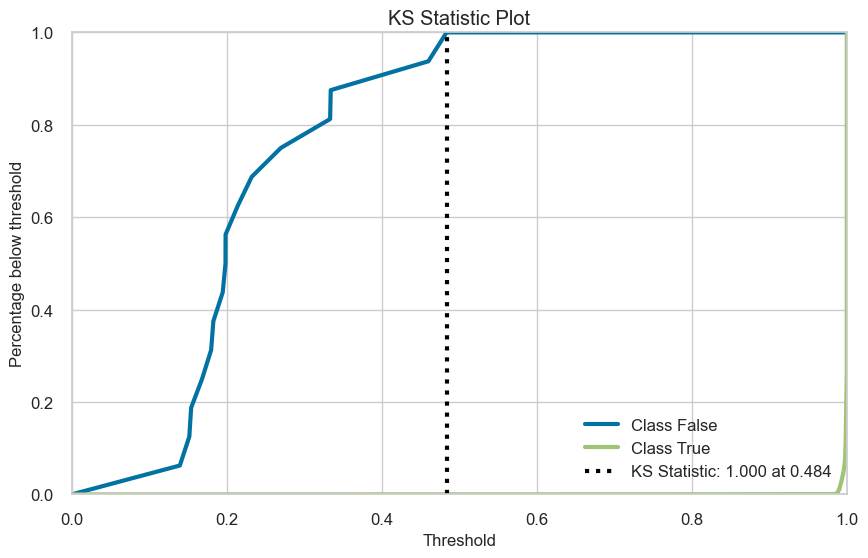

In [60]:
# Plotando o KS
plot_model(reg_logi, plot = 'ks')

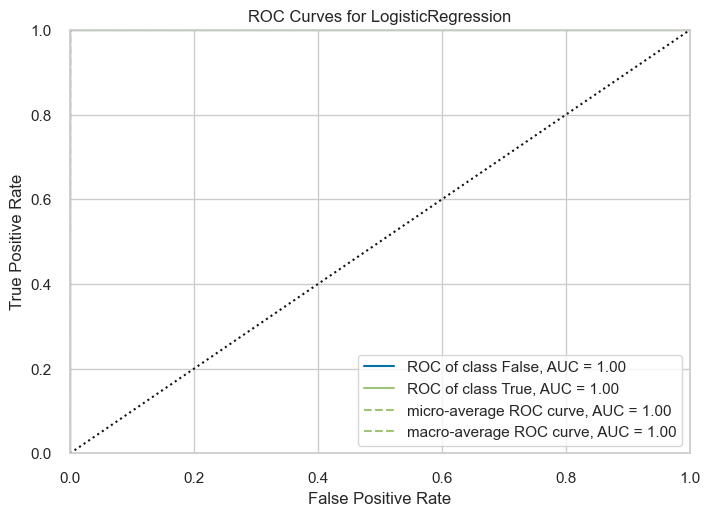

In [61]:
# Plotando o GINI
plot_model(reg_logi, plot = 'auc')

<br>

**Otimizando o modelo**

In [62]:
tuned_model = tune_model(reg_logi, optimize= 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9982,0.9982,0.9982,1.0000,0.9991,0.7991,0.8158
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9982,0.9982,0.9982,1.0000,0.9991,0.6659,0.7065


Fitting 10 folds for each of 10 candidates, totalling 100 fits


<br>

In [63]:
# Salvando o modelo e pipeline
save_model(reg_logi, 'reg_logi')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ano', 'mes', 'imposto_importacao',
                                              'imposto_exportacao'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=No...
                                                               handle_unknown='value',
                                              

<br>

## Etapa 5: Avaliação dos resultados


In [68]:
#criei um novo df através da cópia do df original sem as alterações acima
analise_imposto = df.copy()

In [69]:
#novo df
analise_imposto.head(10)

,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao,ipi_fumo,ipi_bebidas,ipi_automoveis,ipi_importacoes,ipi_outros,...,refis,paes,retencoes_fonte,pagamento_unificado,outras_receitas_rfb,demais_receitas,receita_previdenciaria,receita_previdenciaria_propria,receita_previdenciaria_demais,receitas_outros_orgaos
0,2019,1,AC,75614.39,0.00,0.0,405772.77,0.00,43.50,38359.94,...,NaN,NaN,NaN,NaN,566326.76,NaN,9.482679e+07,NaN,NaN,6.194045e+05
1,2019,2,AC,74008.64,107.06,0.0,115919.43,11017.74,2913.20,20848.47,...,NaN,NaN,NaN,NaN,430579.10,NaN,8.101877e+07,NaN,NaN,1.068504e+06
2,2019,3,AC,368388.57,0.00,0.0,236585.19,11501.16,701344.08,24110.04,...,NaN,NaN,NaN,NaN,454062.07,NaN,8.392409e+07,NaN,NaN,6.926233e+05
3,2019,9,AC,6236.47,11.74,0.0,164211.93,24574.15,0.00,31486.02,...,NaN,NaN,NaN,NaN,140724.26,NaN,1.242954e+08,NaN,NaN,5.476817e+05
4,2019,6,AC,4170.46,12.50,0.0,146149.46,12084.18,0.00,32599.61,...,NaN,NaN,NaN,NaN,392009.05,NaN,1.264125e+08,NaN,NaN,5.772982e+05
5,2019,10,AC,2794.22,0.00,0.0,149384.84,0.00,202258.15,24040.10,...,NaN,NaN,NaN,NaN,344522.04,NaN,1.154539e+08,NaN,NaN,6.529613e+05
6,2019,12,AC,619.85,0.00,0.0,177174.60,0.00,0.00,27808.41,...,NaN,NaN,NaN,NaN,370509.94,NaN,2.433880e+08,NaN,NaN,9.428372e+05
7,2019,8,AC,32757.29,0.00,0.0,132446.80,6820.28,57830.47,30480.04,...,NaN,NaN,NaN,NaN,133067.76,NaN,1.149370e+08,NaN,NaN,6.776377e+05
8,2019,11,AC,14289.93,0.00,0.0,80825.87,0.00,380810.54,41880.09,...,NaN,NaN,NaN,NaN,809038.00,NaN,1.245551e+08,NaN,NaN,5.084698e+05
9,2019,4,AC,83013.48,0.00,0.0,135785.12,4528.88,0.00,21862.88,...,NaN,NaN,NaN,NaN,483004.54,NaN,8.786582e+07,NaN,NaN,7.841080e+05


In [70]:
#Filtrando o dataframe 
analise_imposto =analise_imposto[['ano', 'mes', 'sigla_uf', 'imposto_importacao', 'imposto_exportacao']]

#df filtrado
analise_imposto.head()

,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao
0,2019,1,AC,75614.39,0.00
1,2019,2,AC,74008.64,107.06
2,2019,3,AC,368388.57,0.00
3,2019,9,AC,6236.47,11.74
4,2019,6,AC,4170.46,12.50


In [71]:
#Criando um dicionario para as regiões
dicionario_regioes = {
    'SP':'Sudeste',
    'MG':'Sudeste',
    'RJ':'Sudeste',
    'ES':'Sudeste',
    'BA':'Nordeste',
    'CE':'Nordeste',
    'PE':'Nordeste',
    'MA':'Nordeste',
    'PB':'Nordeste',
    'PI':'Nordeste',
    'RN':'Nordeste',
    'AL':'Nordeste',
    'SE':'Nordeste',
    'PA': 'Norte',
    'AM': 'Norte',
    'RO': 'Norte',
    'TO': 'Norte',
    'AP': 'Norte',
    'AC': 'Norte',
    'RR': 'Norte',
    'RS': 'Sul',
    'PR': 'Sul',
    'SC': 'Sul',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
}

#Iterando no nosso dataframe e criando uma nova coluna com a informação de "Região"
analise_imposto['regiao'] = [dicionario_regioes[resp] for resp in analise_imposto.sigla_uf]

In [72]:
analise_imposto.head(10)

,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao,regiao
0,2019,1,AC,75614.39,0.00,Norte
1,2019,2,AC,74008.64,107.06,Norte
2,2019,3,AC,368388.57,0.00,Norte
3,2019,9,AC,6236.47,11.74,Norte
4,2019,6,AC,4170.46,12.50,Norte
5,2019,10,AC,2794.22,0.00,Norte
6,2019,12,AC,619.85,0.00,Norte
7,2019,8,AC,32757.29,0.00,Norte
8,2019,11,AC,14289.93,0.00,Norte
9,2019,4,AC,83013.48,0.00,Norte


### Perguntas
### 5.1 Quais estados/Regiões obtiveram os maiores impostos de importação e exportação?

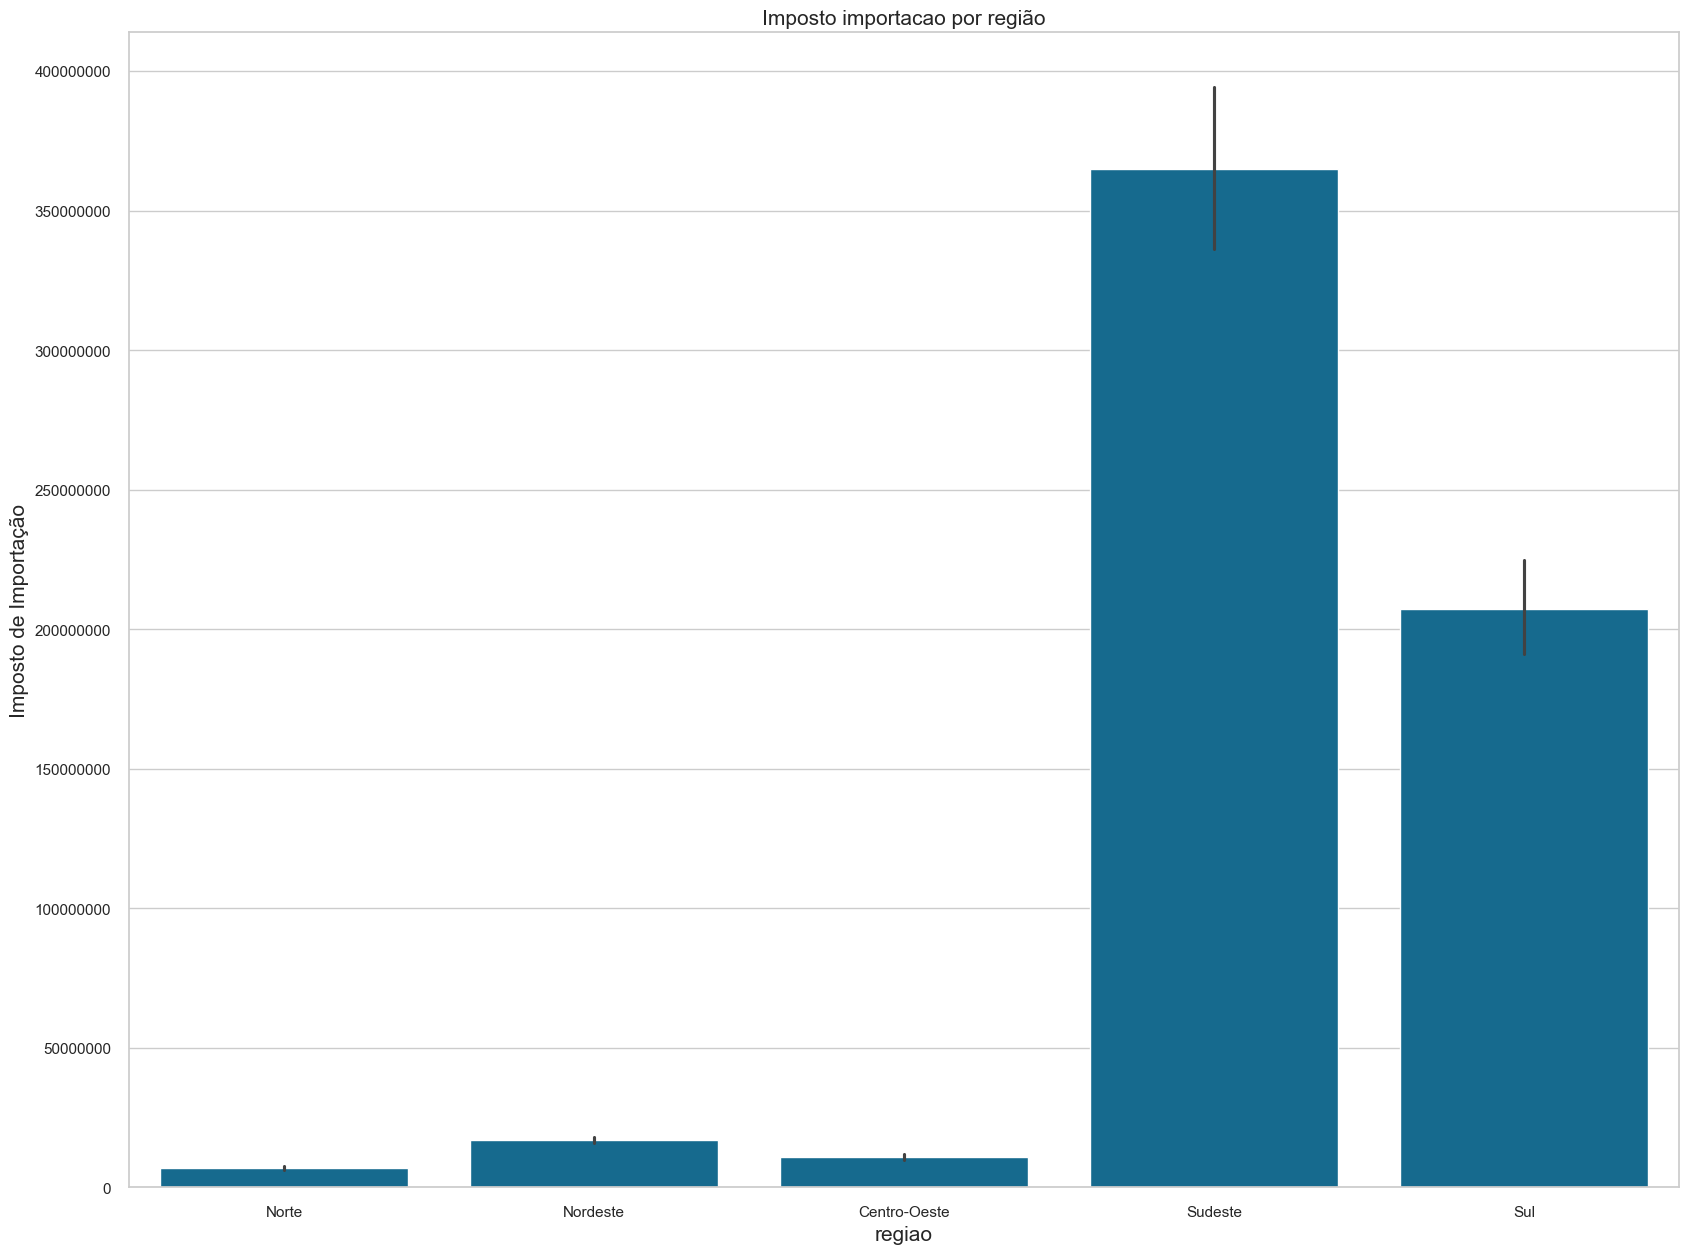

In [102]:
#Configurações de visualização
plt.figure(figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y')  # Retirando a notação científica

# Criando o gráfico de barras
sns.barplot(data=analise_imposto,
            x='regiao',
            y='imposto_importacao')

# Personalizando o gráfico
plt.title("Imposto importacao por região", fontsize=15)
plt.xlabel('regiao', fontsize=15)
plt.ylabel('Imposto de Importação', fontsize=15)

plt.show()

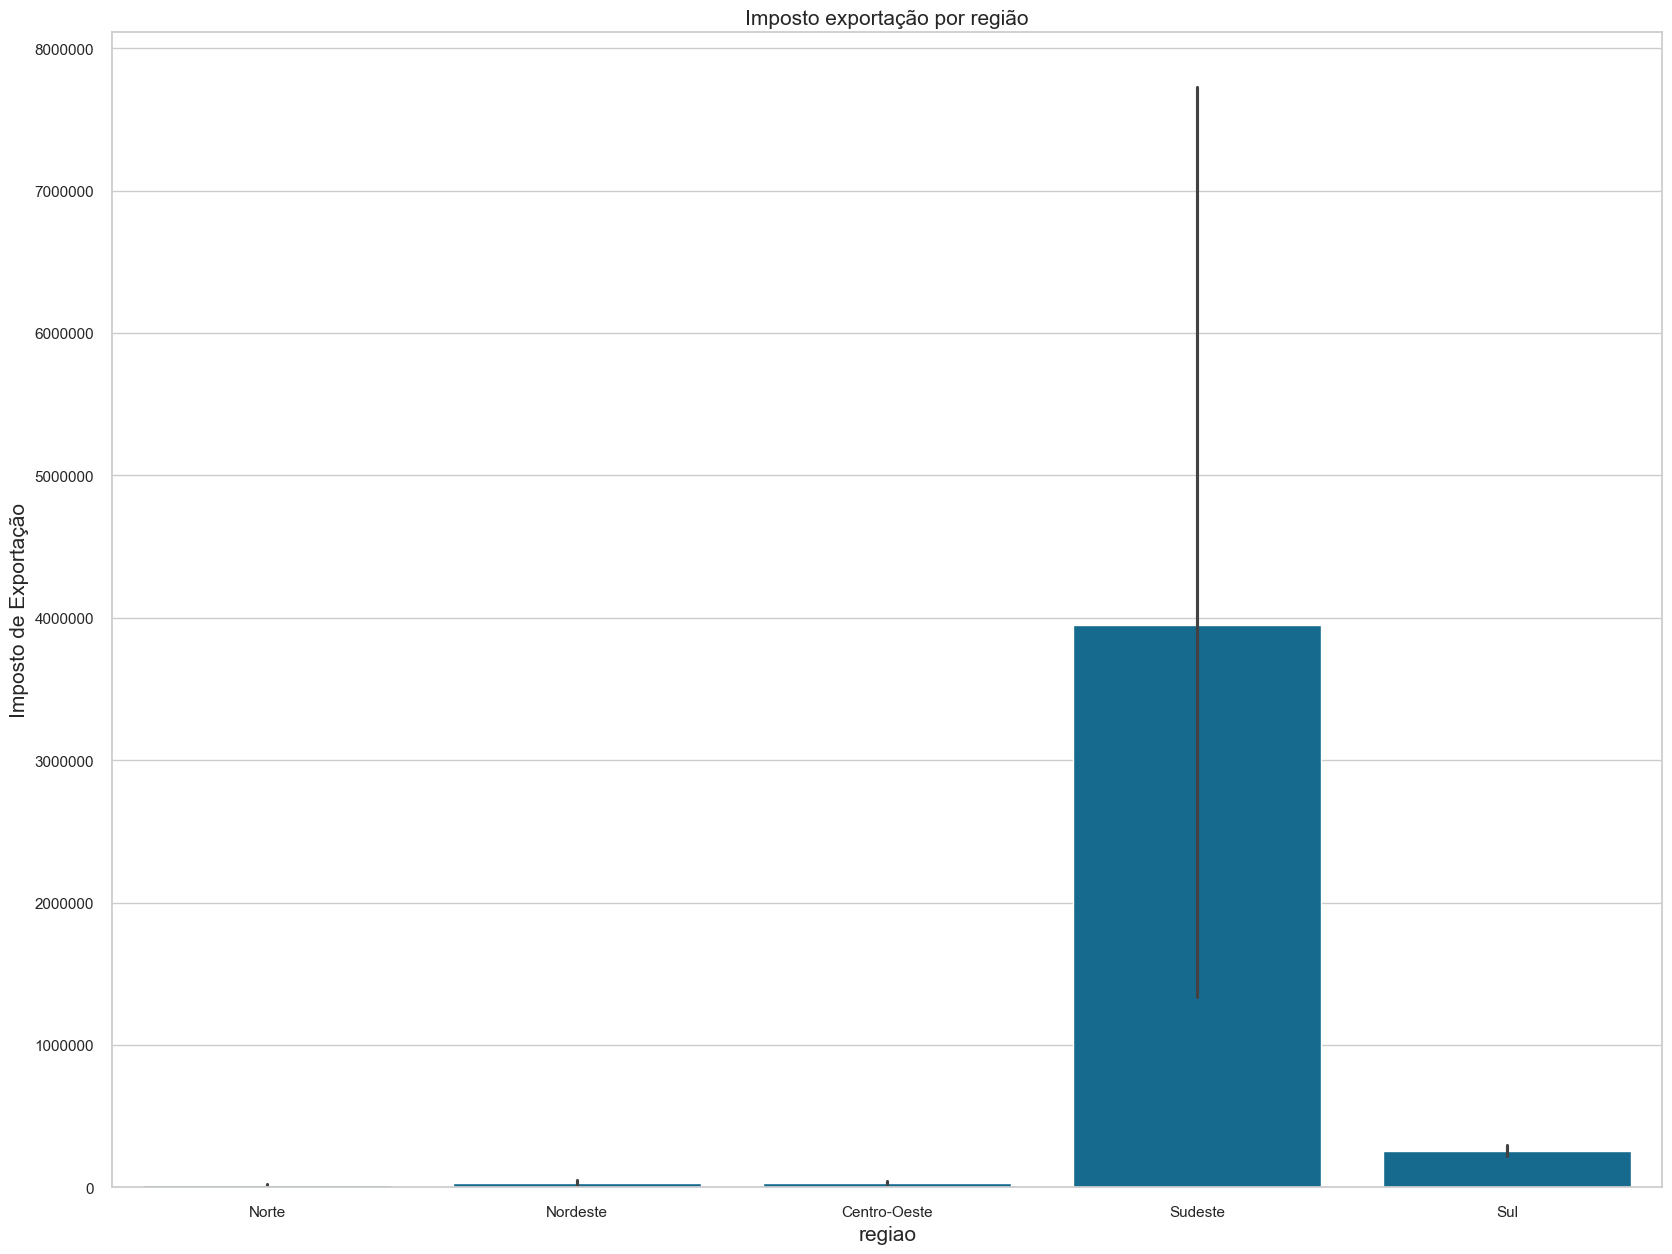

In [106]:
#Configurações de visualização
plt.figure(figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y')  # Retirando a notação científica

# Criando o gráfico de barras
sns.barplot(data=analise_imposto,
            x='regiao',
            y='imposto_exportacao')

# Personalizando o gráfico
plt.title("Imposto exportação por região", fontsize=15)
plt.xlabel('regiao', fontsize=15)
plt.ylabel('Imposto de Exportação', fontsize=15)

plt.show()

### 5.2 Quais anos tiveram a maior importação?

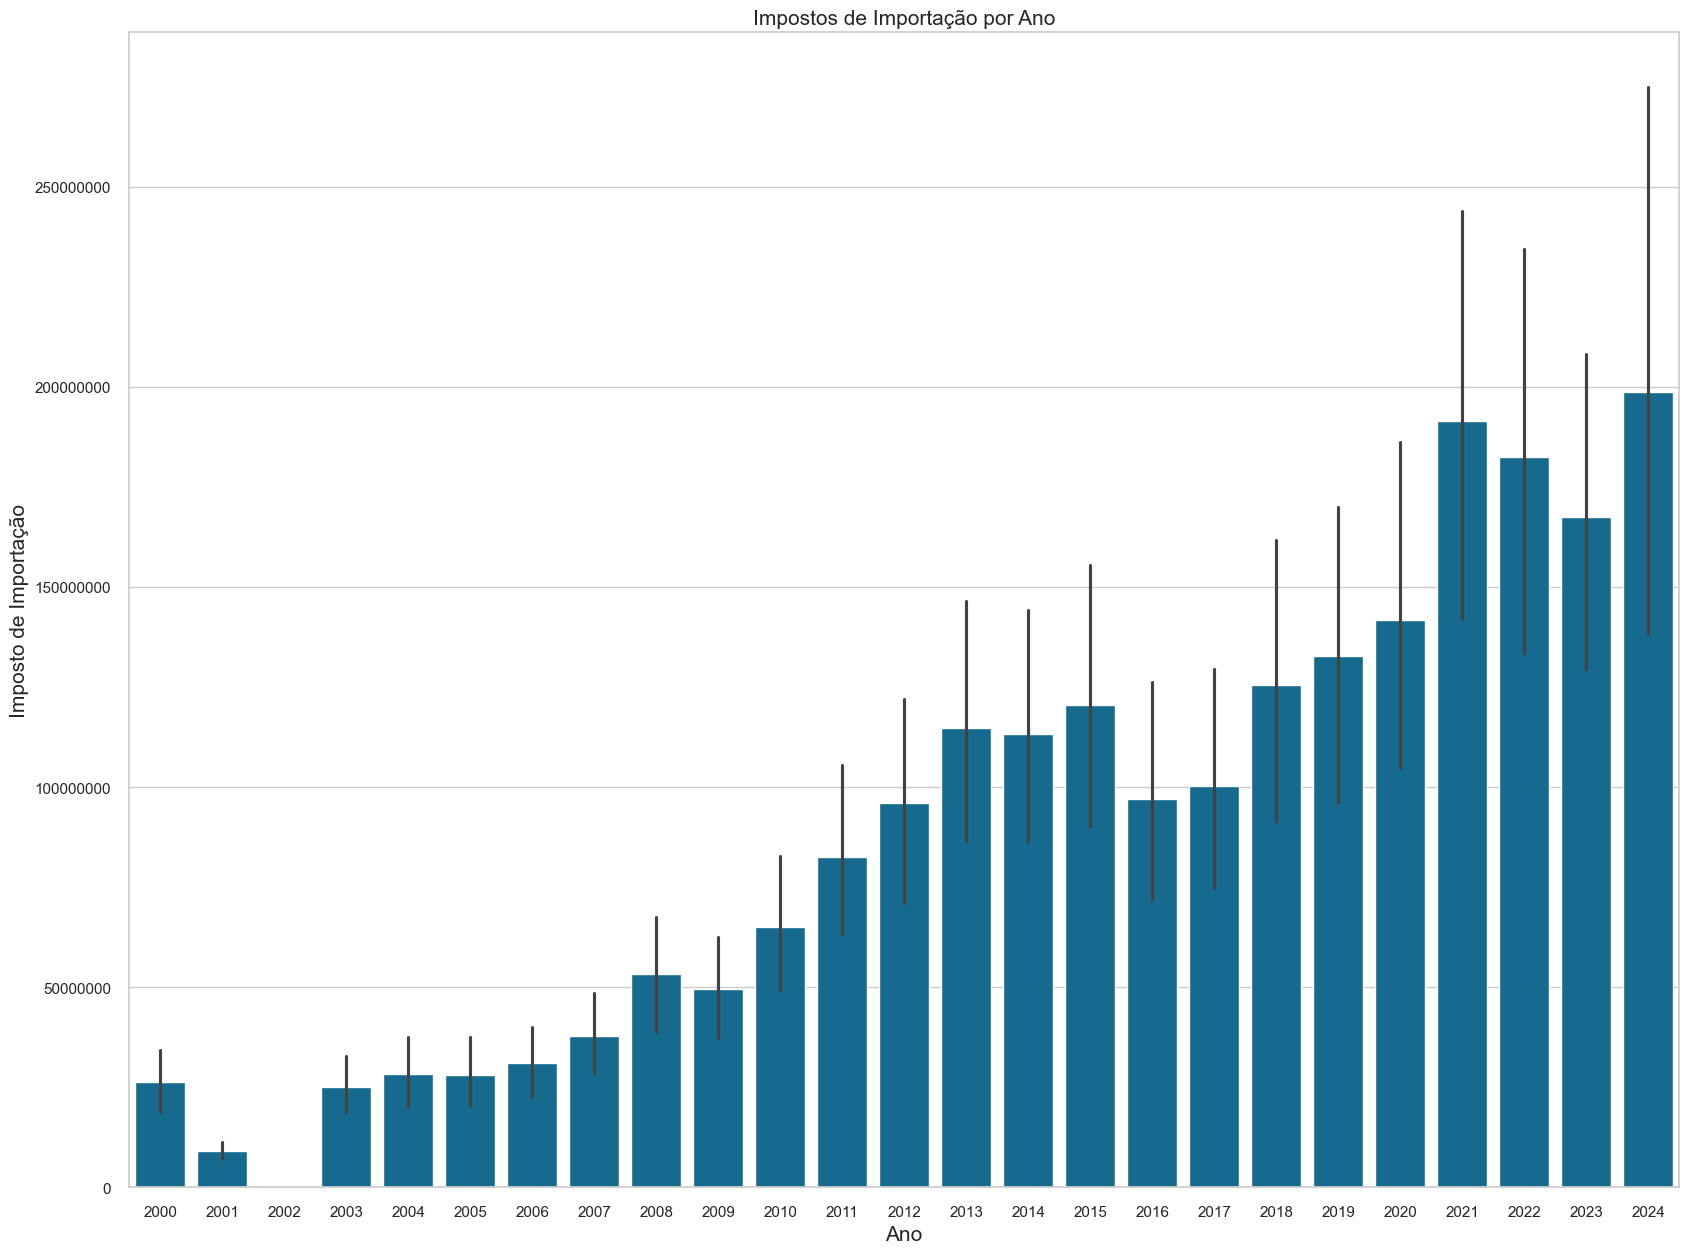

In [100]:
#Configurações de visualização
plt.figure(figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y')  # Retirando a notação científica

# Criando o gráfico de barras
sns.barplot(data=analise_imposto,
            x='ano',
            y='imposto_importacao')

# Personalizando o gráfico
plt.title("Impostos de Importação por Ano", fontsize=15)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Imposto de Importação', fontsize=15)

plt.show()

### 5.3 Quais anos tiveram a maior exportação?

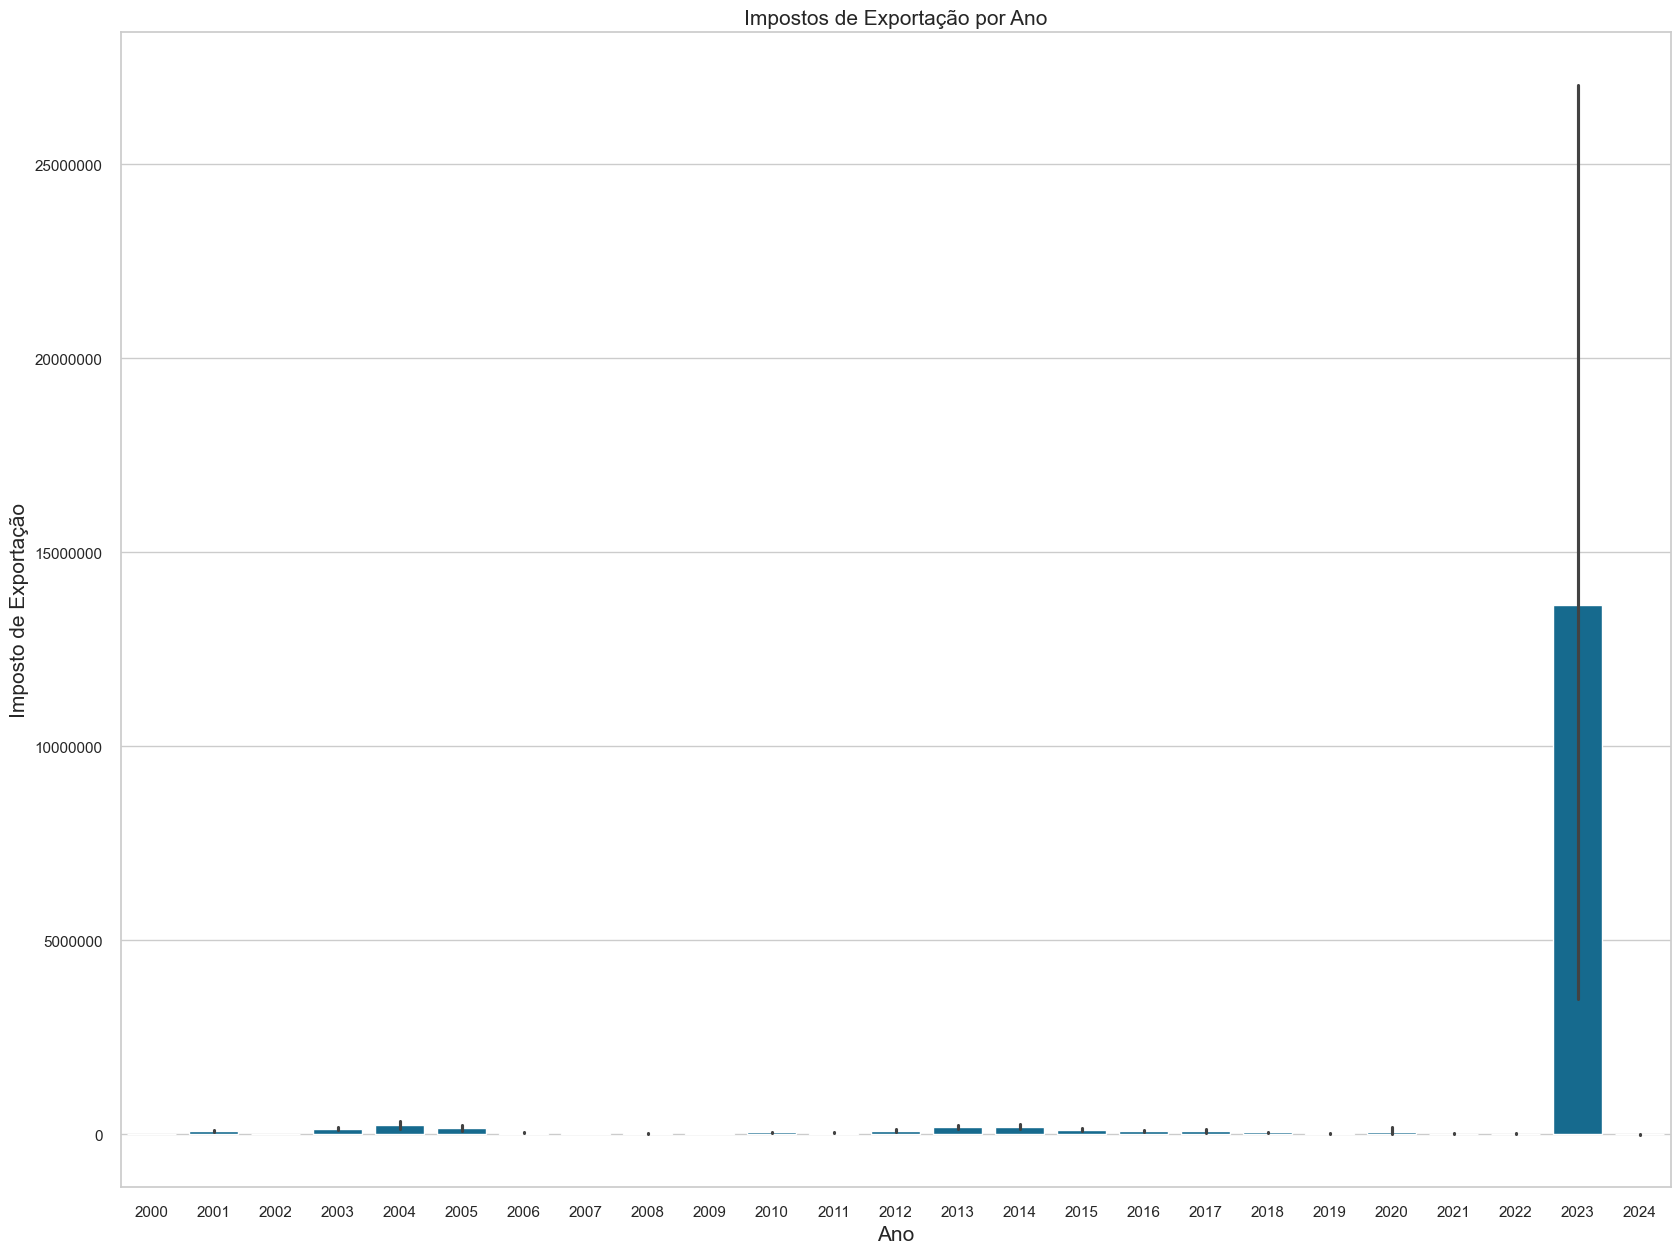

In [101]:
#Configurações de visualização
plt.figure(figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y')  # Retirando a notação científica

# Criando o gráfico de barras
sns.barplot(data=analise_imposto,
            x='ano',
            y='imposto_exportacao')

# Personalizando o gráfico
plt.title("Impostos de Exportação por Ano", fontsize=15)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Imposto de Exportação', fontsize=15)

plt.show()

### 5.4 Linha do tempo dos impostos de importação e exportação por região

Text(0, 0.5, 'imposto exportacao')

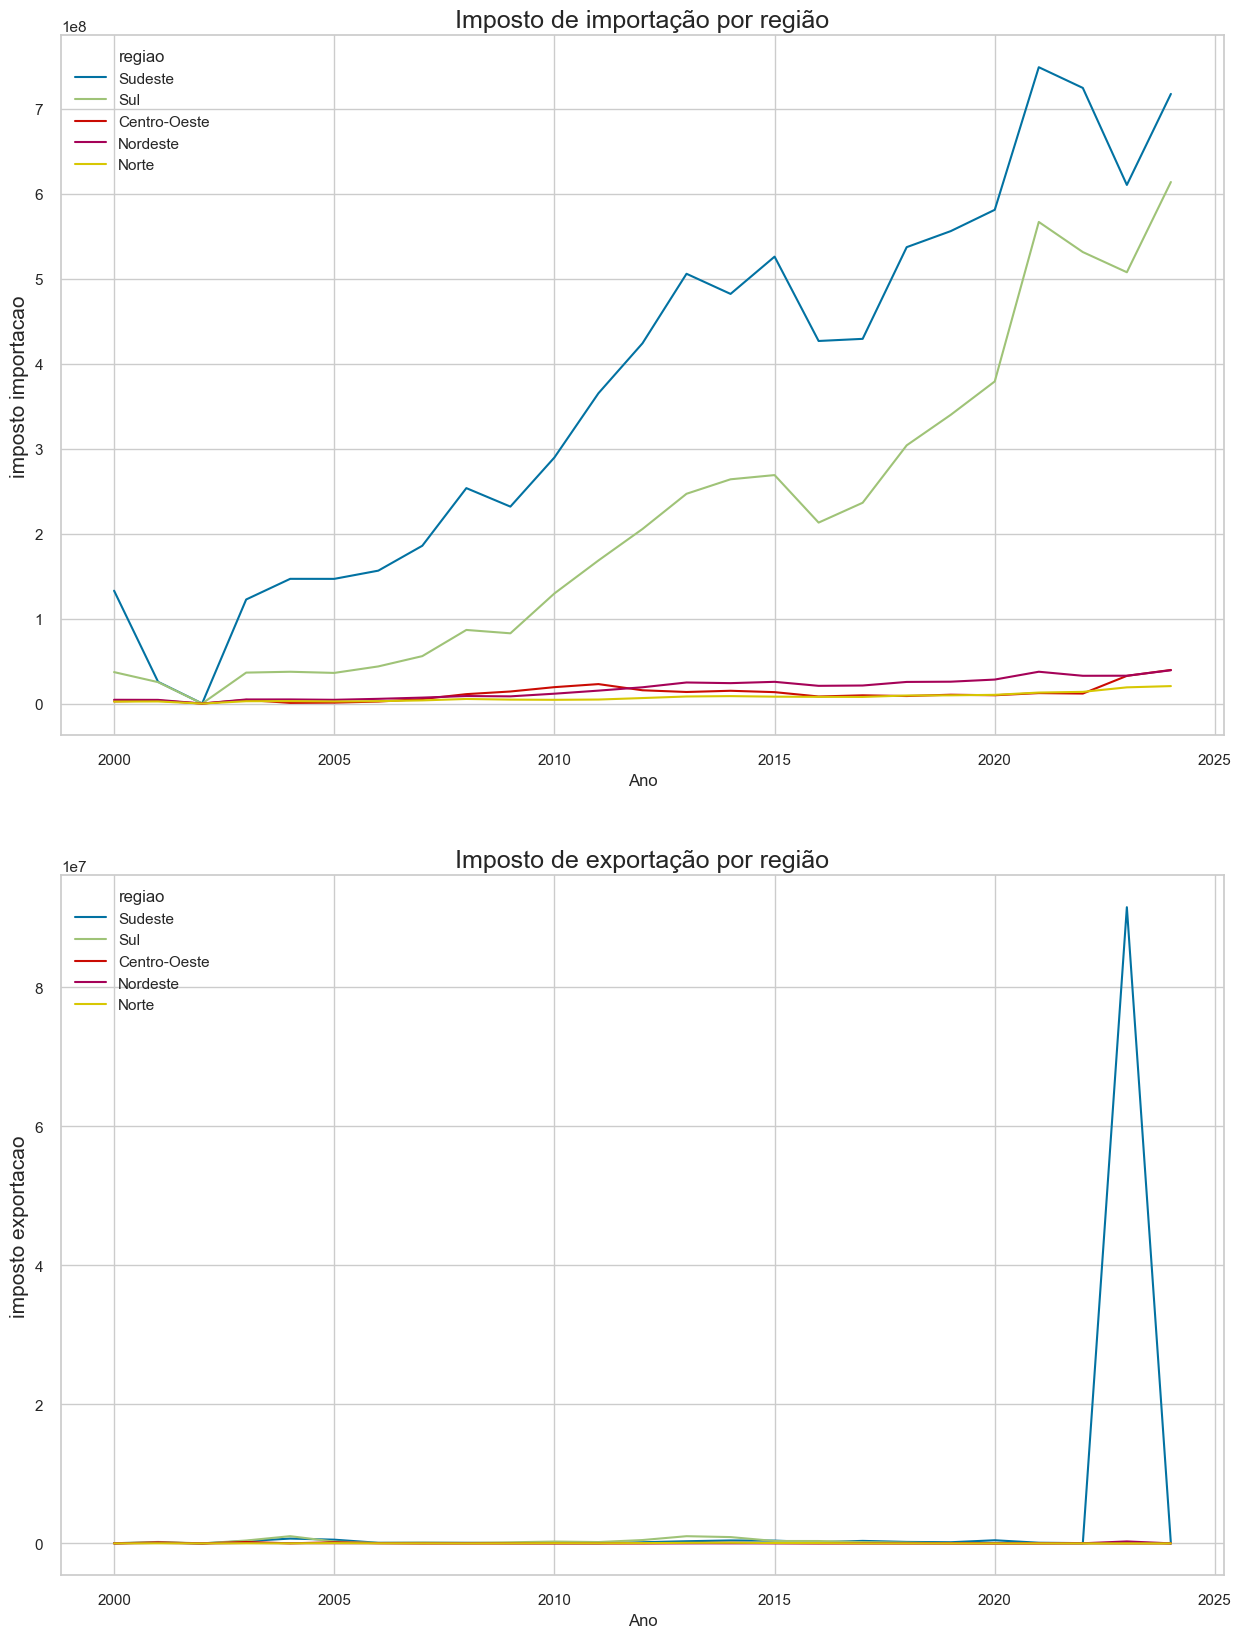

In [108]:
#Configurações de visualização
fig, axes = plt.subplots(2,1,figsize=(15,20))

#Configurando o gráfico
ax1 = sns.lineplot(ax=axes[0],
                 x='ano',
                 y='imposto_importacao',
                 data = analise_imposto,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                 ci=None,
                )
ax1.set_title('Imposto de importação por região', fontsize=18)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('imposto importacao', fontsize=15)

ax2 = sns.lineplot(ax=axes[1],
                 x='ano',
                 y='imposto_exportacao',
                 data = analise_imposto,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                 ci=None,
                )
ax2.set_title('Imposto de exportação por região', fontsize=18)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('imposto exportacao', fontsize=15) 